In [1]:
import numpy as np 
from load_data import load_data
train, valid, test  = load_data('./mnist.pkl.gz')

D:\anaconda\lib\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
D:\anaconda\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
D:\anaconda\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


... loading data


In [2]:
raw_X_train = train[0]
raw_y_train = train[1]
raw_X_val = valid[0]
raw_y_val = valid[1]
raw_X_test = test[0]
raw_y_test = test[1]

In [3]:
print(raw_X_train.shape, raw_X_val.shape, raw_X_test.shape)

(50000, 784) (10000, 784) (10000, 784)


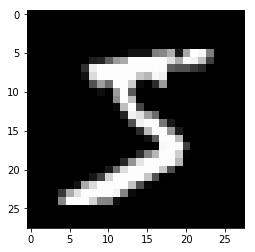

In [4]:
import matplotlib.pyplot as plt
I = raw_X_train[0]
I = I.reshape(28, 28)
plt.imshow(I*256, cmap='gray')
plt.show() 

In [3]:
n_train_samples = raw_X_train.shape[0]
n_val_samples = raw_X_val.shape[0]
n_test_samples = raw_X_test.shape[0]

X_train = raw_X_train.reshape(n_train_samples, 28, 28, 1)
X_val = raw_X_val.reshape(n_val_samples, 28, 28, 1)
X_test = raw_X_test.reshape(n_test_samples, 28, 28, 1)

In [6]:
print(raw_y_train.shape, raw_y_val.shape, raw_y_test.shape)

(50000,) (10000,) (10000,)


In [4]:
from keras import utils
Y_train = utils.to_categorical(raw_y_train, num_classes=10)
Y_val = utils.to_categorical(raw_y_val, num_classes=10)
Y_test = utils.to_categorical(raw_y_test, num_classes=10)

D:\anaconda\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [8]:
print(Y_train.shape, Y_val.shape, Y_test.shape)

(50000, 10) (10000, 10) (10000, 10)


In [5]:
from keras import Model
from keras import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import Dense
def mnist_model():
    X_input = Input(shape=(28, 28, 1), name='input')
    
    X = Conv2D(6, (5, 5), padding='same')(X_input)
    X =Activation('relu')(X)
    X= MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(X)
    
    X = Conv2D(16,(5, 5), padding="same")(X)
    X = Activation("relu")(X)
    X = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(X)
    
    X = Flatten()(X)
    X = Dense(120)(X)
    X = Activation("relu")(X)
    
    X = Dense(84)(X)
    X = Activation("relu")(X)
    
    X = Dense(10)(X)
    X_output = Activation("softmax")(X)
    
    model = Model(inputs = X_input, outputs = X_output)
    
    return model

In [6]:
mnist_model = mnist_model()
mnist_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        2416      
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 16)        0         
_________________________________________________________________
max_

In [7]:
from keras.optimizers import SGD
mnist_model.compile(loss="categorical_crossentropy", optimizer=SGD(lr=0.001), metrics=["accuracy"])

In [8]:
from keras.callbacks import CSVLogger
csv_logger = CSVLogger('training.log')

In [9]:
history = mnist_model.fit(X_train, Y_train, validation_data=[X_val, Y_val], batch_size=128, epochs=20, verbose=1, callbacks=[csv_logger])

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 70s 1ms/step - loss: 2.2996 - acc: 0.1010 - val_loss: 2.2882 - val_acc: 0.1028
Epoch 2/20
50000/50000 [==============================] - 66s 1ms/step - loss: 2.2773 - acc: 0.1367 - val_loss: 2.2637 - val_acc: 0.1826
Epoch 3/20
50000/50000 [==============================] - 64s 1ms/step - loss: 2.2483 - acc: 0.2350 - val_loss: 2.2256 - val_acc: 0.2921
Epoch 4/20
50000/50000 [==============================] - 67s 1ms/step - loss: 2.1938 - acc: 0.3370 - val_loss: 2.1458 - val_acc: 0.3792
Epoch 5/20
50000/50000 [==============================] - 64s 1ms/step - loss: 2.0691 - acc: 0.4236 - val_loss: 1.9519 - val_acc: 0.5029
Epoch 6/20
50000/50000 [==============================] - 64s 1ms/step - loss: 1.7490 - acc: 0.5960 - val_loss: 1.4584 - val_acc: 0.7305
Epoch 7/20
50000/50000 [==============================] - 65s 1ms/step - loss: 1

In [10]:
(loss, accuracy) = mnist_model.evaluate(X_test, Y_test, batch_size=128, verbose=1)
print("accuracy: {:.2f}%".format(accuracy * 100))

10000/10000 [==============================] - 6s 588us/step
accuracy: 92.56%


In [15]:
print(history.history)

{'loss': [2.298287029342651, 2.2784478147888185, 2.254126477813721, 2.2152049073791504, 2.13812848526001, 1.9601714239883423, 1.5360724259185792, 0.9779956140136719, 0.6778259690666198, 0.5447483205604553, 0.4722065202140808, 0.4246502883052826, 0.3900753437900543, 0.3629552750301361, 0.34063414200782777, 0.32239456194877625, 0.30621487765312194, 0.2919089814376831, 0.2795747111606598, 0.2686596245908737], 'acc': [0.09091999999523163, 0.14325999999046327, 0.22543999999046327, 0.3178999999809265, 0.4321999999809265, 0.591780000038147, 0.7079400000190735, 0.7782400000190735, 0.8247999999809266, 0.8502799999809265, 0.865539999961853, 0.877640000038147, 0.886640000038147, 0.8937599999809265, 0.9001000000190735, 0.905280000038147, 0.90886, 0.9133800000190735, 0.916980000038147, 0.920499999961853]}


In [11]:
import pandas as pd
df = pd.read_csv('training.log')

In [12]:
print(df)

    epoch      acc      loss  val_acc  val_loss
0       0  0.10102  2.299579   0.1028  2.288184
1       1  0.13672  2.277261   0.1826  2.263725
2       2  0.23502  2.248286   0.2921  2.225622
3       3  0.33702  2.193802   0.3792  2.145845
4       4  0.42360  2.069126   0.5029  1.951863
5       5  0.59602  1.748973   0.7305  1.458445
6       6  0.75460  1.167195   0.8193  0.856400
7       7  0.82050  0.733897   0.8587  0.570713
8       8  0.85298  0.550592   0.8792  0.452985
9       9  0.87114  0.464943   0.8906  0.391676
10     10  0.88320  0.413164   0.9019  0.355783
11     11  0.89194  0.378619   0.9065  0.328067
12     12  0.89860  0.353230   0.9093  0.306685
13     13  0.90352  0.333646   0.9149  0.291751
14     14  0.90756  0.317508   0.9157  0.279207
15     15  0.91138  0.303796   0.9194  0.267400
16     16  0.91368  0.292196   0.9208  0.259405
17     17  0.91624  0.281276   0.9240  0.250704
18     18  0.91842  0.271279   0.9290  0.239406
19     19  0.92228  0.262523   0.9291  0